In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [2]:
df=pd.read_csv('crime_data.csv')
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [4]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [5]:
df2=df.drop(['Unnamed: 0'],axis=1)
df2

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [6]:
#Normalization using UDF
def norm(i):
  x=(i-i.min())/(i.max()-i.min())
  return (x)

In [7]:
df2n=norm(df2)
df2n

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


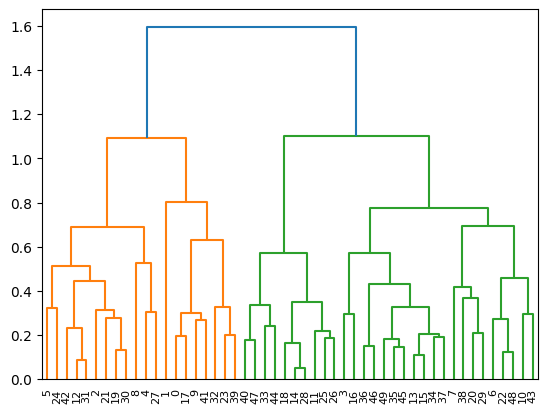

In [8]:
#dendrogram
d=sch.dendrogram(sch.linkage(df2n,'complete'))

In [9]:
#creating clusters
c=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
c

AgglomerativeClustering(affinity='euclidean')

In [10]:
y=pd.DataFrame(c.fit_predict(df2n),columns=['cluster_id'])
y['cluster_id'].value_counts()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


0    30
1    20
Name: cluster_id, dtype: int64

In [12]:
#adding to df
df2['cluster_id']=c.labels_
df2

,Murder,Assault,UrbanPop,Rape,cluster_id
0,13.2,236,58,21.2,1
1,10.0,263,48,44.5,1
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,1
5,7.9,204,78,38.7,1
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,0
8,15.4,335,80,31.9,1
9,17.4,211,60,25.8,1


In [14]:
df2.groupby('cluster_id').agg(['mean']).reset_index()

,cluster_id,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,4.870,114.433333,63.633333,15.943333
1,1,12.165,255.250000,68.400000,29.165000


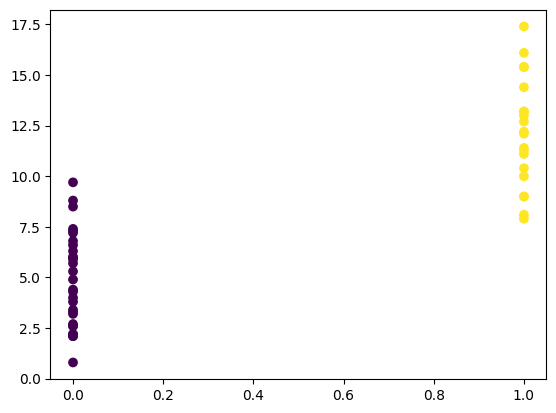

In [15]:
#plotting clusters
plt.scatter(df2['cluster_id'],df2['Murder'],c=c.labels_)

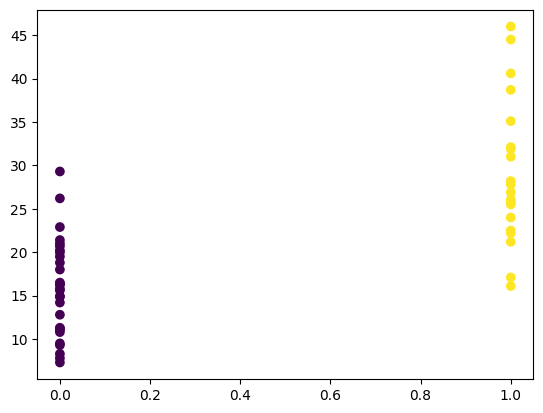

In [16]:
plt.scatter(df2['cluster_id'],df2['Rape'],c=c.labels_)

# **Normalizing data with in-built function**

In [17]:
from sklearn.preprocessing import normalize

df3=df.drop(['Unnamed: 0'],axis=1)

df3n=pd.DataFrame(normalize(df3),columns=df3.columns)
df3n

,Murder,Assault,UrbanPop,Rape
0,0.054031,0.966016,0.237411,0.086778
1,0.036872,0.969739,0.176987,0.164081
2,0.026439,0.959624,0.261122,0.101185
3,0.044528,0.961392,0.252998,0.098669
4,0.030657,0.940134,0.309972,0.138295
5,0.035594,0.919142,0.351437,0.174367
6,0.024486,0.816202,0.571341,0.082362
7,0.023674,0.954965,0.288897,0.063397
8,0.044478,0.967547,0.231056,0.092134
9,0.078534,0.952332,0.270805,0.116446


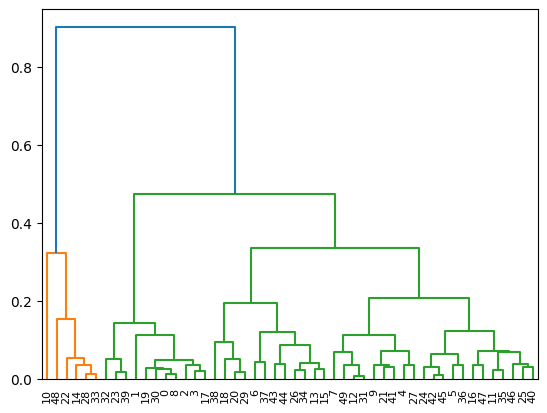

In [18]:
#Dendrogram
d=sch.dendrogram(sch.linkage(df3n,'complete'))

In [19]:
#creating clusters
c4=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='ward')
c4

AgglomerativeClustering(affinity='euclidean', n_clusters=4)

In [20]:
y=pd.DataFrame(c4.fit_predict(df3n),columns=['cluster_id'])
y['cluster_id'].value_counts()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


2    20
3    12
1    12
0     6
Name: cluster_id, dtype: int64

In [21]:
#adding to df3
df3['cluster_id']=c4.labels_
df3

,Murder,Assault,UrbanPop,Rape,cluster_id
0,13.2,236,58,21.2,2
1,10.0,263,48,44.5,2
2,8.1,294,80,31.0,2
3,8.8,190,50,19.5,2
4,9.0,276,91,40.6,2
5,7.9,204,78,38.7,3
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,2
8,15.4,335,80,31.9,2
9,17.4,211,60,25.8,2


In [22]:
df3.groupby('cluster_id').agg(['mean']).reset_index()

,cluster_id,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,2.616667,54.833333,62.000000,12.333333
1,1,4.758333,116.583333,70.083333,15.683333
2,2,11.760000,255.550000,66.100000,27.090000
3,3,6.783333,141.583333,61.833333,21.466667


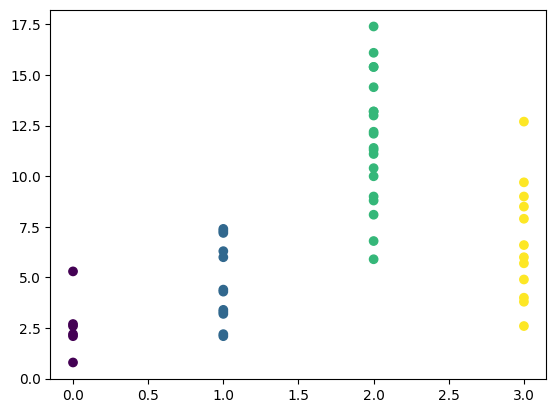

In [23]:
#plot clusters
plt.scatter(df3['cluster_id'],df3['Murder'], c=c4.labels_)

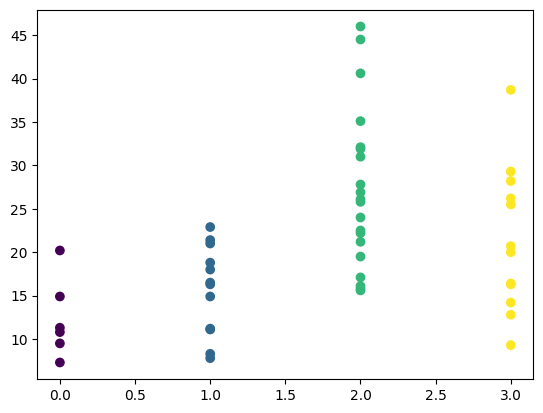

In [24]:
plt.scatter(df3['cluster_id'],df3['Rape'], c=c4.labels_)